# Medical Expenses Prediction Using Regression Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


#EXPLORATORY DATA ANALYSIS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualization for better understanding of how data patterns and distributions

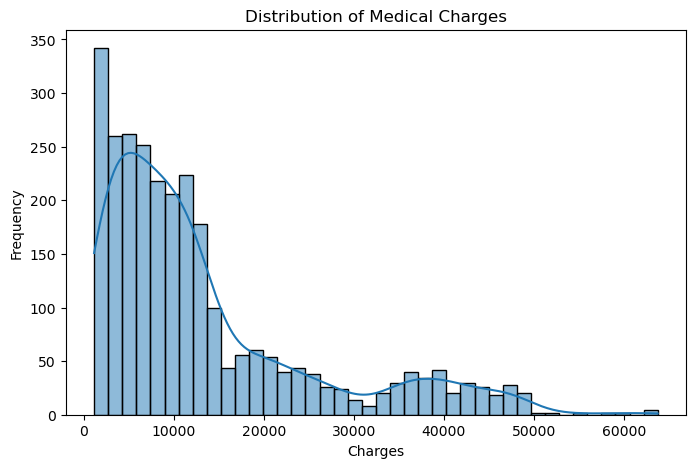

In [6]:
#Histogram for charges
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=40, kde=True)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


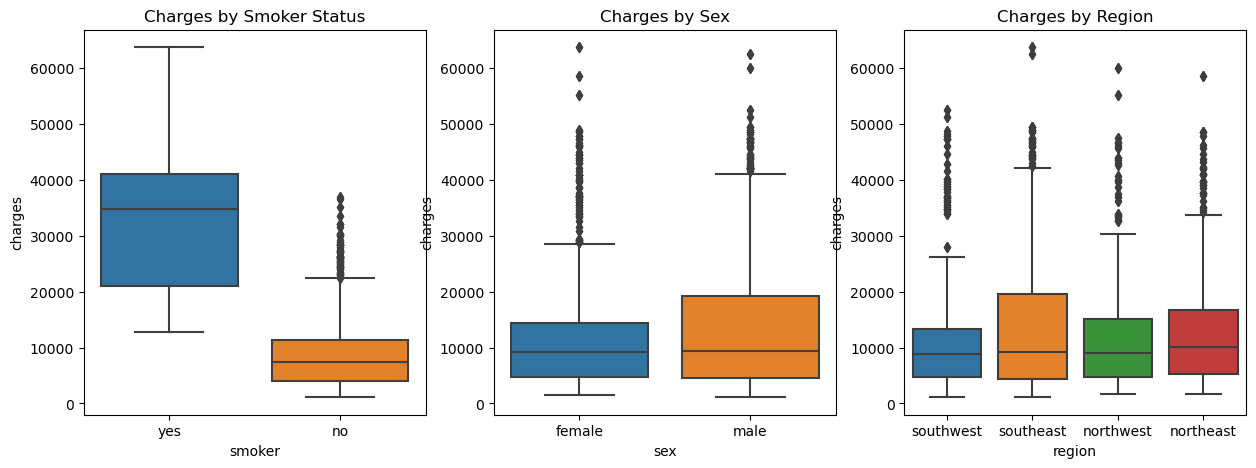

In [7]:
# Box plots for charges by categorical variables
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')

plt.subplot(1,3,2)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')

plt.subplot(1,3,3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')

plt.show()


In [8]:
# Correlation matrix for numeric features
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
               age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000


#DATA PREPROCESSING

In [9]:
# Identifying categorical and numerical features
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

In [10]:
X=df.drop('charges',axis=1)
y=df['charges']

 One-hot encoding for categorical features

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = ohe.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_features))




In [12]:
df_encoded=pd.concat([df.drop(columns=categorical_features),encoded_df],axis=1)
X = df_encoded.drop('charges',axis=1)
y=df_encoded['charges']

In [13]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2767,47,45.320,1,0.0,0.0,0.0,1.0,0.0
2768,21,34.600,0,0.0,0.0,0.0,0.0,1.0
2769,19,26.030,1,1.0,1.0,1.0,0.0,0.0
2770,23,18.715,0,1.0,0.0,1.0,0.0,0.0


Splitting into training and test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#MODEL BUILDING

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
model.predict([[19,	26.030,	1,	1.0,	1.0,	1.0,	0.0,	0.0]])

array([25738.0053721])

In [17]:
y_pred=model.predict(X_test)

MODEL EVALUATION

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
metrics = {}
metrics['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred)
}

In [19]:
print(f"Mean Squared Error (MSE): {metrics['Linear Regression']['MSE']:.2f}")
print(f"Mean Absolute Error (MAE): {metrics['Linear Regression']['MAE']:.2f}")
print(f"R-squared (R2): {metrics['Linear Regression']['R2']:.2f}")

Mean Squared Error (MSE): 39933194.55
Mean Absolute Error (MAE): 4160.25
R-squared (R2): 0.74


actual vs predicted

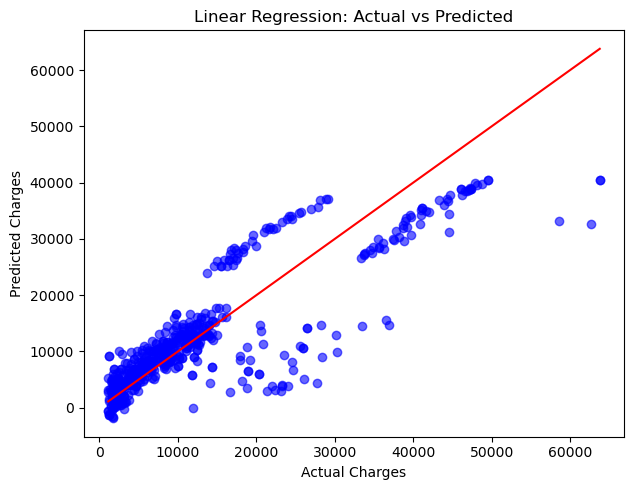

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.tight_layout()
plt.show()


In [21]:
model.predict([[19,	26.030,	1,	1.0,	1.0,	1.0,	0.0,	0.0]])

array([25738.0053721])

#Model building
#RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
y_pred_rf=model_rf.predict(X_test)

In [24]:
metrics['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

In [25]:
print(f"Mean Squared Error (MSE): {metrics['Random Forest']['MSE']:.2f}")
print(f"Mean Absolute Error (MAE): {metrics['Random Forest']['MAE']:.2f}")
print(f"R-squared (R2): {metrics['Random Forest']['R2']:.2f}")

Mean Squared Error (MSE): 7599737.39
Mean Absolute Error (MAE): 1309.83
R-squared (R2): 0.95


actual vs predicted

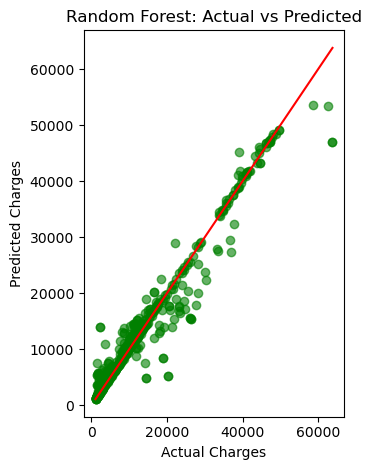

In [26]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.tight_layout()
plt.show()

In [27]:
model_rf.predict([[19,	26.030,	1,	1.0,	1.0,	1.0,	0.0,	0.0]])

array([16469.098838])

Medical expense predictions for the same inputs using Linear Regression and Random Forest models produced noticeably different results. This difference arises because Linear Regression assumes all features influence the target in a strictly linear fashion, while Random Forest learns from complex, non-linear interactions.

Visualizations confirm that Random Forest predictions align more closely with actual expenses, minimizing errors and capturing real-world variability better. These findings highlight the importance of model selection: advanced models like Random Forest offer superior accuracy and reliability for predicting health insurance costs. This can drive more precise risk assessments and fairer premium settings for insurance com

In [28]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)
